**IMT2200 - Introducción a Ciencia de Datos**  
**Pontificia Universidad Católica de Chile**  
**Instituto de Ingeniería Matemática y Computacional**
**2025 - Segundo Semestre**

**Profesor:** Rodrigo A. Carrasco 

---

# 🩺 **Enfermedades respiratorias en urgencias: pre y post COVID-19**

---

###  **Integrantes**
- Santiago González  
- Fernanda Le Roy  
- Joab Vivanco  

---

📅 **Fecha de entrega inicial:** 21 de octubre de 2025  


---


## Contexto y motivación

La pandemia de **COVID-19** produjo un cambio radical en los patrones de consulta por enfermedades respiratorias en los servicios de urgencia.  
Antes del 2020, la frecuencia con la que se presentaban virus respiratorios como **influenza**, **virus sincicial** y **adenovirus** determinaba los flujos de pacientes.  

Sin embargo, tras las medidas de confinamiento, el uso de mascarillas y el cambio en conductas sociales, se observaron variaciones en la **incidencia y distribución** de estas patologías.

La motivación de este proyecto es analizar si, efectivamente, la pandemia **alteró la cantidad de atenciones por enfermedades respiratorias en urgencias** y si estas modificaciones se han mantenido en los años posteriores al confinamiento.  

El problema es relevante porque los servicios de urgencia deben **planificar sus recursos humanos y materiales** de acuerdo con la demanda, y comprender estas tendencias puede facilitar la preparación frente a **futuras crisis sanitarias**.

La **audiencia objetivo** de este análisis son principalmente las **autoridades de salud pública** (Ministerio de Salud, Servicios de Salud regionales) y los **equipos de gestión hospitalaria**, quienes requieren información basada en datos para optimizar políticas de prevención, campañas de vacunación y asignación de recursos.


## Objetivos y preguntas de investigación

### Objetivo general

Analizar la **evolución de las consultas por enfermedades respiratorias en servicios de urgencia en Chile**, comparando el periodo previo y posterior a la pandemia de COVID-19, para identificar **tendencias y cambios significativos**.

---

### Objetivos específicos

- Describir la **incidencia de patologías respiratorias** atendidas en urgencias en la última década.  
- Comparar la **distribución temporal** de estas consultas antes y después de la pandemia.  
- Identificar **diferencias en prevalencia** según grupo etario, región y nivel de gravedad.  
- Explorar qué patologías han experimentado **mayores variaciones en frecuencia** tras el COVID-19.  
- Generar evidencia que pueda ser utilizada para la **planificación de servicios de salud**.

---

### Pregunta principal

> **¿Se ha observado un aumento de las enfermedades respiratorias que motivan consultas en urgencias tras la pandemia, en comparación con el periodo previo al COVID-19?**

---

### Preguntas secundarias

1. ¿Cómo influye el **tipo de patología** en la clasificación del nivel de urgencia (leve, moderado, grave)?  
2. ¿Existen **regiones o comunas** con una mayor incidencia de enfermedades respiratorias?  
3. ¿Qué **patologías respiratorias** han sido más prevalentes en la última década y cómo ha cambiado su distribución a lo largo de los años?  
4. ¿Cuál es la **relación entre los rangos etarios** y la prevalencia de enfermedades respiratorias, y qué patologías son más comunes en cada grupo de edad?  

---

📌 En conjunto, estas preguntas abordan las dimensiones **clínica, geográfica, temporal y poblacional** del fenómeno estudiado, aportando una visión integral que permitirá responder la pregunta de investigación principal.


---

🧭 En las siguientes secciones se presentan los datos utilizados, el proceso de limpieza y un análisis exploratorio que busca responder las preguntas planteadas.

## Descripción de los datos

Los datos utilizados provienen de la **Plataforma de Datos Abiertos del Gobierno de Chile**, específicamente del conjunto **“Atenciones de urgencia por causas respiratorias”**  
(https://datos.gob.cl/dataset/atenciones-de-urgencia-causas-respiratorias).

El registro se realiza **semanalmente** e incluye información sobre las atenciones por enfermedades respiratorias en establecimientos de salud de todo el país, principalmente del **sector público**.

Cada fila del dataset representa un **establecimiento en una semana específica**, e incluye tanto variables **administrativas** como **epidemiológicas**.

---

###  Variables principales

- **EstablecimientoCodigo:** Identificador único del establecimiento.  
- **RegionGlosa / ComunaGlosa:** Región y comuna donde se ubica el establecimiento.  
- **Causa:** Tipo de enfermedad respiratoria (ej. influenza, virus sincicial, adenovirus).  
- **Anio / SemanaEstadistica:** Año y semana epidemiológica del registro.  
- **NumTotal:** Número total de consultas por causas respiratorias.  
- **NumMenor1Anio, Num1a4Anios, Num5a14Anios, Num15a64Anios, Num65Mas:** Distribución de consultas por grupo etario.  
- **NivelAtencion / TipoEstablecimiento / NivelComplejidad:** Clasificación administrativa y operativa del centro de salud.

---

 En términos generales, el dataset contiene **múltiples años (2013 en adelante)** y permite analizar la **evolución temporal, distribución geográfica y diferencias por edad o tipo de patología** en las consultas de urgencia respiratoria en Chile.

Antes de realizar el análisis exploratorio, es necesario definir la estrategia de procesamiento que seguiremos con los datos.

###  Estrategia de procesamiento: ELT vs ETL

Existen dos enfoques comunes para trabajar con datos:

- **ETL (Extract → Transform → Load):**  
 
- **ELT (Extract → Load → Transform):**  
 

### En este proyecto utilizaremos ELT

Optamos por **ELT** porque:

- El dataset es **público, estructurado y grande**, con posibles ajustes menores (nulos, formato de texto, nombres).  
- Nos permite **mantener una copia cruda** en la carpeta `/data/raw/` y trabajar las transformaciones directamente en el notebook.  
- Facilita la **reproducibilidad y trazabilidad** del proceso, mostrando cada paso de limpieza dentro del análisis.

---

##  Limpieza y preparación de los datos

In [76]:
# librerías usadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq

In [2]:
data = pq.read_table("../data/atenciones_respiratorias.parquet")

data = data.to_pandas()
data

,EstablecimientoCodigo,EstablecimientoGlosa,RegionCodigo,RegionGlosa,ComunaCodigo,ComunaGlosa,ServicioSaludCodigo,ServicioSaludGlosa,TipoEstablecimiento,DependenciaAdministrativa,...,Anio,SemanaEstadistica,OrdenCausa,Causa,NumTotal,NumMenor1Anio,Num1a4Anios,Num5a14Anios,Num15a64Anios,Num65oMas
0,105805,SAR Tierras Blancas,4,Región De Coquimbo,4102,Coquimbo,5,Servicio de Salud Coquimbo,Servicio de Atención Primaria de Urgencia de A...,Municipal,...,2015,29,4,IRA Alta (J00-J06),216,13,24,43,109,27
1,116101,Hospital de Teno,7,Región Del Maule,7308,Teno,16,Servicio de Salud Del Maule,Hospital,Servicio de Salud,...,2016,30,32,HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO,3,0,0,0,2,1
2,200759,SUR Morza,7,Región Del Maule,7308,Teno,16,Servicio de Salud Del Maule,Servicio de Urgencia Rural (SUR),Municipal,...,2024,3,32,HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO,0,0,0,0,0,0
3,109805,SAR La Pincoya,13,Región Metropolitana de Santiago,13107,Huechuraba,9,Servicio de Salud Metropolitano Norte,Servicio de Atención Primaria de Urgencia de A...,Municipal,...,2025,36,4,IRA Alta (J00-J06),180,4,30,38,99,9
4,109809,SAR Conchalí,13,Región Metropolitana de Santiago,13104,Conchalí,9,Servicio de Salud Metropolitano Norte,Servicio de Atención Primaria de Urgencia de A...,Municipal,...,2020,24,8,Crisis obstructiva bronquial (J40-J46),0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267875,122100,Hospital Clínico Regional (Valdivia),14,Región De Los Ríos,14101,Valdivia,22,Servicio de Salud Los Rios,Hospital,Servicio de Salud,...,2014,14,8,Crisis obstructiva bronquial (J40-J46),81,8,23,9,25,16
3267876,200753,SUR Cariquima,1,Región De Tarapacá,1403,Colchane,2,Servicio de Salud Tarapacá,Servicio de Urgencia Rural (SUR),Municipal,...,2024,9,34,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",0,0,0,0,0,0
3267877,109802,SAPU Lucas Sierra,13,Región Metropolitana de Santiago,13104,Conchalí,9,Servicio de Salud Metropolitano Norte,Servicio de Atención Primaria de Urgencia (SAPU),Municipal,...,2022,39,5,Influenza (J09-J11),6,0,0,3,3,0
3267878,124810,SAR Puerto Varas,10,Región De Los Lagos,10109,Puerto Varas,24,Servicio de Salud Del Reloncaví,Servicio de Atención Primaria de Urgencia de A...,Municipal,...,2022,50,7,Bronquitis/bronquiolitis aguda (J20-J21),61,6,16,16,15,8


In [3]:
# Identificar columnas con valores faltantes 
data.isnull().sum()

EstablecimientoCodigo        17714
EstablecimientoGlosa         17714
RegionCodigo                 17714
RegionGlosa                  17714
ComunaCodigo                 17714
ComunaGlosa                  17714
ServicioSaludCodigo          17714
ServicioSaludGlosa           17714
TipoEstablecimiento          17714
DependenciaAdministrativa    17714
NivelAtencion                17714
TipoUrgencia                 17714
Latitud                      17714
Longitud                     17714
NivelComplejidad             17714
Anio                             0
SemanaEstadistica                0
OrdenCausa                       0
Causa                            0
NumTotal                         0
NumMenor1Anio                    0
Num1a4Anios                      0
Num5a14Anios                     0
Num15a64Anios                    0
Num65oMas                        0
dtype: int64

se realiza una primera exploración de los valores faltantes en el dataset mediante isnull().sum()

Luego de identificar las columnas con valores faltantes, se calcula el porcentaje de nulos en cada variable (isnull().mean())

In [4]:
# verificamos ahora si estas columnas con datos null son relevantes
# para evaluar de que forma borrarlas o ajustar los datos de forma pertinente
data.isnull().mean().sort_values(ascending=False)

EstablecimientoCodigo        0.005421
EstablecimientoGlosa         0.005421
RegionCodigo                 0.005421
RegionGlosa                  0.005421
ComunaCodigo                 0.005421
ComunaGlosa                  0.005421
ServicioSaludCodigo          0.005421
ServicioSaludGlosa           0.005421
TipoEstablecimiento          0.005421
DependenciaAdministrativa    0.005421
NivelAtencion                0.005421
TipoUrgencia                 0.005421
Latitud                      0.005421
Longitud                     0.005421
NivelComplejidad             0.005421
Anio                         0.000000
SemanaEstadistica            0.000000
OrdenCausa                   0.000000
Causa                        0.000000
NumTotal                     0.000000
NumMenor1Anio                0.000000
Num1a4Anios                  0.000000
Num5a14Anios                 0.000000
Num15a64Anios                0.000000
Num65oMas                    0.000000
dtype: float64

Podemos interpretar esto como que las columnas que antes parecían llenas de valores nulos en realidad solo tienen alrededor del 0.5% de valores faltantes, por ende, los datos están bastante completos pero se veían como hartos valores faltantes porque el dataset es grande, pero quizá estos valores nulos no son triviales.

Si observamos pareciera ser que los valores nulos tienen que ver con valores que entregan información geográfica e institucional de los contagios, es pertinente analizarlos...

In [5]:
# NaN analisis por cada columna
data[data["EstablecimientoCodigo"].isna()].head(10)

,EstablecimientoCodigo,EstablecimientoGlosa,RegionCodigo,RegionGlosa,ComunaCodigo,ComunaGlosa,ServicioSaludCodigo,ServicioSaludGlosa,TipoEstablecimiento,DependenciaAdministrativa,...,Anio,SemanaEstadistica,OrdenCausa,Causa,NumTotal,NumMenor1Anio,Num1a4Anios,Num5a14Anios,Num15a64Anios,Num65oMas
7,None,None,None,None,None,None,None,None,None,None,...,2022,5,32,HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO,0,0,0,0,0,0
219,None,None,None,None,None,None,None,None,None,None,...,2025,40,4,IRA Alta (J00-J06),11,0,2,1,8,0
416,None,None,None,None,None,None,None,None,None,None,...,2025,38,6,Neumonía (J12-J18),1,0,0,0,1,0
521,None,None,None,None,None,None,None,None,None,None,...,2024,3,7,Bronquitis/bronquiolitis aguda (J20-J21),2,0,0,1,1,0
674,None,None,None,None,None,None,None,None,None,None,...,2024,52,10,"Covid-19, Virus no identificado U07.2",1,0,0,0,1,0
871,None,None,None,None,None,None,None,None,None,None,...,2024,31,32,HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO,0,0,0,0,0,0
957,None,None,None,None,None,None,None,None,None,None,...,2020,53,9,"Otra causa respiratoria (J22, J30-J39, J47, J6...",1,0,0,1,0,0
1619,None,None,None,None,None,None,None,None,None,None,...,2024,29,7,Bronquitis/bronquiolitis aguda (J20-J21),71,0,13,16,29,13
2065,None,None,None,None,None,None,None,None,None,None,...,2024,14,6,Neumonía (J12-J18),3,0,1,0,2,0
2130,None,None,None,None,None,None,None,None,None,None,...,2018,25,9,"Otra causa respiratoria (J22, J30-J39, J47, J6...",14,0,1,6,7,0


In [6]:
columnas_nulas = [
    "EstablecimientoCodigo", "EstablecimientoGlosa", "RegionCodigo",
    "RegionGlosa", "ComunaCodigo", "ComunaGlosa", "ServicioSaludCodigo",
    "ServicioSaludGlosa", "TipoEstablecimiento", "DependenciaAdministrativa",
    "NivelAtencion", "TipoUrgencia", "Latitud", "Longitud", "NivelComplejidad"
]
data[columnas_nulas].isnull().all(axis=1).sum()

np.int64(17714)

Con esta información inicial se busca tener claridad sobre el contenido y la estructura del dataset antes de aplicar procesos de limpieza y transformación.

Luego de hacer esto nos damos cuenta que las filas sí tienen datos de año, semana, causa y número de casos, pero sin ningún contexto de dónde provienen (no sabemos de qué comuna, hospital, ni región). Seguramente son registros agregados o globales (por ejemplo, totales nacionales o semanales) que no se asignaron a un establecimiento o comuna específica. Como posteriormente vamos a evaluar el total de contagios, no eliminaremos los NaN, sino que dejaremos 2 dataset distintos, uno con los NaN y otro sin para cuando tengamos que graficar o analizar según institución. 

Debido a que nuestra propuesta se basa entre pre y post covid, es por esto que se decidió tomar los 3 años previos y 3 años posteriores a la pandemia, tomando los años de pandemia como 2020, 2021 y 2022.   2017, 2018, 2019, 2023, 2024 y 2025. 

In [8]:
#Revisé si es que tenemos muchos datos como para trabajar con ellos, para no elegir años que tengan pocos datos y afecten el resultado.
data[["Anio"]].value_counts()

Anio
2024    385452
2023    381912
2022    379620
2021    378000
2020    324682
2025    307980
2019    192522
2018    186912
2017    186032
2016    184832
2015    184480
2014    175456
Name: count, dtype: int64

In [10]:
#Ahora hago el filtro según los años que les dije recién
df_per_year = data[data["Anio"] >= 2017]
df_per_year = df_per_year[df_per_year["Anio"] != 2020]
df_per_year = df_per_year[df_per_year["Anio"] != 2021]
df_per_year = df_per_year[df_per_year["Anio"] != 2022]
df_per_year.count()


EstablecimientoCodigo        1627554
EstablecimientoGlosa         1627554
RegionCodigo                 1627554
RegionGlosa                  1627554
ComunaCodigo                 1627554
ComunaGlosa                  1627554
ServicioSaludCodigo          1627554
ServicioSaludGlosa           1627554
TipoEstablecimiento          1627554
DependenciaAdministrativa    1627554
NivelAtencion                1627554
TipoUrgencia                 1627554
Latitud                      1627554
Longitud                     1627554
NivelComplejidad             1627554
Anio                         1640810
SemanaEstadistica            1640810
OrdenCausa                   1640810
Causa                        1640810
NumTotal                     1640810
NumMenor1Anio                1640810
Num1a4Anios                  1640810
Num5a14Anios                 1640810
Num15a64Anios                1640810
Num65oMas                    1640810
dtype: int64

In [11]:
df_per_year.isnull().sum()

EstablecimientoCodigo        13256
EstablecimientoGlosa         13256
RegionCodigo                 13256
RegionGlosa                  13256
ComunaCodigo                 13256
ComunaGlosa                  13256
ServicioSaludCodigo          13256
ServicioSaludGlosa           13256
TipoEstablecimiento          13256
DependenciaAdministrativa    13256
NivelAtencion                13256
TipoUrgencia                 13256
Latitud                      13256
Longitud                     13256
NivelComplejidad             13256
Anio                             0
SemanaEstadistica                0
OrdenCausa                       0
Causa                            0
NumTotal                         0
NumMenor1Anio                    0
Num1a4Anios                      0
Num5a14Anios                     0
Num15a64Anios                    0
Num65oMas                        0
dtype: int64

In [20]:
df_per_year.columns

Index(['EstablecimientoCodigo', 'EstablecimientoGlosa', 'RegionCodigo',
       'RegionGlosa', 'ComunaCodigo', 'ComunaGlosa', 'ServicioSaludCodigo',
       'ServicioSaludGlosa', 'TipoEstablecimiento',
       'DependenciaAdministrativa', 'NivelAtencion', 'TipoUrgencia', 'Latitud',
       'Longitud', 'NivelComplejidad', 'Anio', 'SemanaEstadistica',
       'OrdenCausa', 'Causa', 'NumTotal', 'NumMenor1Anio', 'Num1a4Anios',
       'Num5a14Anios', 'Num15a64Anios', 'Num65oMas'],
      dtype='object')

In [21]:
#Hago una copia del dataframe para no afectar el principal y ver solo los nulos

dfff = df_per_year[['EstablecimientoCodigo', 'EstablecimientoGlosa', 'RegionCodigo',
       'RegionGlosa', 'ComunaCodigo', 'ComunaGlosa', 'ServicioSaludCodigo',
       'ServicioSaludGlosa', 'TipoEstablecimiento',
       'DependenciaAdministrativa', 'NivelAtencion', 'TipoUrgencia', 'NivelComplejidad', 'Anio', 'SemanaEstadistica',
       'OrdenCausa', 'Causa', 'NumTotal', 'NumMenor1Anio', 'Num1a4Anios',
       'Num5a14Anios', 'Num15a64Anios', 'Num65oMas']]

In [22]:
df_nulos = dfff[dfff.isnull().any(axis=1)]
df_nulos

,EstablecimientoCodigo,EstablecimientoGlosa,RegionCodigo,RegionGlosa,ComunaCodigo,ComunaGlosa,ServicioSaludCodigo,ServicioSaludGlosa,TipoEstablecimiento,DependenciaAdministrativa,...,Anio,SemanaEstadistica,OrdenCausa,Causa,NumTotal,NumMenor1Anio,Num1a4Anios,Num5a14Anios,Num15a64Anios,Num65oMas
219,None,None,None,None,None,None,None,None,None,None,...,2025,40,4,IRA Alta (J00-J06),11,0,2,1,8,0
416,None,None,None,None,None,None,None,None,None,None,...,2025,38,6,Neumonía (J12-J18),1,0,0,0,1,0
521,None,None,None,None,None,None,None,None,None,None,...,2024,3,7,Bronquitis/bronquiolitis aguda (J20-J21),2,0,0,1,1,0
674,None,None,None,None,None,None,None,None,None,None,...,2024,52,10,"Covid-19, Virus no identificado U07.2",1,0,0,0,1,0
871,None,None,None,None,None,None,None,None,None,None,...,2024,31,32,HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266948,None,None,None,None,None,None,None,None,None,None,...,2024,49,32,HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO,0,0,0,0,0,0
3267217,None,None,None,None,None,None,None,None,None,None,...,2025,11,11,"Covid-19, Virus identificado U07.1",0,0,0,0,0,0
3267299,None,None,None,None,None,None,None,None,None,None,...,2024,34,3,TOTAL CAUSAS SISTEMA RESPIRATORIO,52,3,5,16,23,5
3267526,None,None,None,None,None,None,None,None,None,None,...,2024,41,6,Neumonía (J12-J18),0,0,0,0,0,0


Aca vemos la cantidad de datos que quitaremos en comparacion de la cantidad de datos que tenemos por año

In [23]:
df_nulos["Anio"].value_counts()

Anio
2025    6228
2024    3312
2023    1320
2019     844
2018     832
2017     720
Name: count, dtype: int64

In [24]:
df_per_year["Anio"].value_counts()

Anio
2024    385452
2023    381912
2025    307980
2019    192522
2018    186912
2017    186032
Name: count, dtype: int64

Creamos el dataframe principal que utlizaremos para hacer los analisis

In [25]:
df_anios = df_per_year.dropna()
df_anios.isnull().sum()

EstablecimientoCodigo        0
EstablecimientoGlosa         0
RegionCodigo                 0
RegionGlosa                  0
ComunaCodigo                 0
ComunaGlosa                  0
ServicioSaludCodigo          0
ServicioSaludGlosa           0
TipoEstablecimiento          0
DependenciaAdministrativa    0
NivelAtencion                0
TipoUrgencia                 0
Latitud                      0
Longitud                     0
NivelComplejidad             0
Anio                         0
SemanaEstadistica            0
OrdenCausa                   0
Causa                        0
NumTotal                     0
NumMenor1Anio                0
Num1a4Anios                  0
Num5a14Anios                 0
Num15a64Anios                0
Num65oMas                    0
dtype: int64

In [26]:
df_anios

,EstablecimientoCodigo,EstablecimientoGlosa,RegionCodigo,RegionGlosa,ComunaCodigo,ComunaGlosa,ServicioSaludCodigo,ServicioSaludGlosa,TipoEstablecimiento,DependenciaAdministrativa,...,Anio,SemanaEstadistica,OrdenCausa,Causa,NumTotal,NumMenor1Anio,Num1a4Anios,Num5a14Anios,Num15a64Anios,Num65oMas
2,200759,SUR Morza,7,Región Del Maule,7308,Teno,16,Servicio de Salud Del Maule,Servicio de Urgencia Rural (SUR),Municipal,...,2024,3,32,HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO,0,0,0,0,0,0
3,109805,SAR La Pincoya,13,Región Metropolitana de Santiago,13107,Huechuraba,9,Servicio de Salud Metropolitano Norte,Servicio de Atención Primaria de Urgencia de A...,Municipal,...,2025,36,4,IRA Alta (J00-J06),180,4,30,38,99,9
6,118100,Hospital Clínico Regional Dr. Guillermo Grant ...,8,Región Del Bíobío,8101,Concepción,18,Servicio de Salud Concepción,Hospital,Servicio de Salud,...,2017,18,9,"Otra causa respiratoria (J22, J30-J39, J47, J6...",19,2,0,1,11,5
10,117104,Hospital Comunitario de Salud Familiar Pedro M...,16,Región De Ñuble,16109,Yungay,17,Servicio de Salud Ñuble,Hospital,Servicio de Salud,...,2025,11,6,Neumonía (J12-J18),7,0,1,0,1,5
13,122101,Hospital de Corral,14,Región De Los Ríos,14102,Corral,22,Servicio de Salud Los Rios,Hospital,Servicio de Salud,...,2018,33,4,IRA Alta (J00-J06),30,4,2,7,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267868,200133,SAR Bicentenario,13,Región Metropolitana de Santiago,13128,Renca,10,Servicio de Salud Metropolitano Occidente,Servicio de Atención Primaria de Urgencia de A...,Municipal,...,2023,17,8,Crisis obstructiva bronquial (J40-J46),4,0,0,0,3,1
3267869,200779,SUR Marta Estevez - Retiro,7,Región Del Maule,7405,Retiro,16,Servicio de Salud Del Maule,Servicio de Urgencia Rural (SUR),Municipal,...,2023,45,9,"Otra causa respiratoria (J22, J30-J39, J47, J6...",1,0,0,1,0,0
3267872,110110,Instituto Traumatológico Dr. Teodoro Gebauer,13,Región Metropolitana de Santiago,13101,Santiago,10,Servicio de Salud Metropolitano Occidente,Hospital,Servicio de Salud,...,2023,27,7,Bronquitis/bronquiolitis aguda (J20-J21),0,0,0,0,0,0
3267874,113807,SAPU Padre Esteban Gumucio,13,Región Metropolitana de Santiago,13111,La Granja,13,Servicio de Salud Metropolitano Sur,Servicio de Atención Primaria de Urgencia (SAPU),Municipal,...,2018,26,3,TOTAL CAUSAS SISTEMA RESPIRATORIO,292,6,52,67,145,22


Desde aquí en adelante comienza la etapa de limpieza del dataset. El objetivo es revisar la estructura general de los datos, y preparar las variables para el análisis exploratorio posterior.

In [27]:
# tipo de cada columna
print(df_anios.dtypes)

EstablecimientoCodigo        object
EstablecimientoGlosa         object
RegionCodigo                 object
RegionGlosa                  object
ComunaCodigo                 object
ComunaGlosa                  object
ServicioSaludCodigo          object
ServicioSaludGlosa           object
TipoEstablecimiento          object
DependenciaAdministrativa    object
NivelAtencion                object
TipoUrgencia                 object
Latitud                      object
Longitud                     object
NivelComplejidad             object
Anio                          int32
SemanaEstadistica             int32
OrdenCausa                    int32
Causa                        object
NumTotal                      int32
NumMenor1Anio                 int32
Num1a4Anios                   int32
Num5a14Anios                  int32
Num15a64Anios                 int32
Num65oMas                     int32
dtype: object


In [29]:
# creamos la columna fecha 
df_anios.loc[:,'Fecha'] = pd.to_datetime(
    df_anios['Anio'].astype(str) + df_anios['SemanaEstadistica'].astype(str) + '1',
    format='%Y%U%w', errors='coerce'
)

Además de eso, agregamos la columna fecha que nos permitirá graficar y hacer un análisis más en detalle por año, mes, entre otras cosas.

In [30]:
# verificamos si la columna se creó bien o algunas fechas quedaron conNat 
fechas_invalidas = df_anios[df_anios["Fecha"].isna()][["Anio", "SemanaEstadistica"]]
print("Fechas inválidas:", len(fechas_invalidas))
fechas_invalidas.head()

Fechas inválidas: 0


,Anio,SemanaEstadistica


In [31]:
df_anios.head()

,EstablecimientoCodigo,EstablecimientoGlosa,RegionCodigo,RegionGlosa,ComunaCodigo,ComunaGlosa,ServicioSaludCodigo,ServicioSaludGlosa,TipoEstablecimiento,DependenciaAdministrativa,...,SemanaEstadistica,OrdenCausa,Causa,NumTotal,NumMenor1Anio,Num1a4Anios,Num5a14Anios,Num15a64Anios,Num65oMas,Fecha
2,200759,SUR Morza,7,Región Del Maule,7308,Teno,16,Servicio de Salud Del Maule,Servicio de Urgencia Rural (SUR),Municipal,...,3,32,HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO,0,0,0,0,0,0,2024-01-22
3,109805,SAR La Pincoya,13,Región Metropolitana de Santiago,13107,Huechuraba,9,Servicio de Salud Metropolitano Norte,Servicio de Atención Primaria de Urgencia de A...,Municipal,...,36,4,IRA Alta (J00-J06),180,4,30,38,99,9,2025-09-08
6,118100,Hospital Clínico Regional Dr. Guillermo Grant ...,8,Región Del Bíobío,8101,Concepción,18,Servicio de Salud Concepción,Hospital,Servicio de Salud,...,18,9,"Otra causa respiratoria (J22, J30-J39, J47, J6...",19,2,0,1,11,5,2017-05-01
10,117104,Hospital Comunitario de Salud Familiar Pedro M...,16,Región De Ñuble,16109,Yungay,17,Servicio de Salud Ñuble,Hospital,Servicio de Salud,...,11,6,Neumonía (J12-J18),7,0,1,0,1,5,2025-03-17
13,122101,Hospital de Corral,14,Región De Los Ríos,14102,Corral,22,Servicio de Salud Los Rios,Hospital,Servicio de Salud,...,33,4,IRA Alta (J00-J06),30,4,2,7,15,2,2018-08-20


Ahora revisamos los duplicados.


In [32]:
# Ver cuántas filas duplicadas hay
duplicados = df_anios.duplicated().sum()
print("Filas duplicadas:", duplicados)

Filas duplicadas: 0


In [35]:
# vemos si eliminamos o no
dup_detallado = df_anios.duplicated(
    subset=['EstablecimientoCodigo', 'Anio', 'SemanaEstadistica', 'Causa', 'NumTotal']
)
print("Duplicados verdaderos:", dup_detallado.sum())
df_anios[dup_detallado].head()

Duplicados verdaderos: 0


,EstablecimientoCodigo,EstablecimientoGlosa,RegionCodigo,RegionGlosa,ComunaCodigo,ComunaGlosa,ServicioSaludCodigo,ServicioSaludGlosa,TipoEstablecimiento,DependenciaAdministrativa,...,SemanaEstadistica,OrdenCausa,Causa,NumTotal,NumMenor1Anio,Num1a4Anios,Num5a14Anios,Num15a64Anios,Num65oMas,Fecha


Vemos que no hay filas duplicadas por lo tanto no es necesario eliminar/modificar más el dataset de df_anios. Finalmente df_anios corresponde a nuestro df_principal con el cuál vamos a trabajar.

## Observaciones sobre los tipos de causas

Se identificaron dos grandes grupos dentro de las causas respiratorias:

- **Contagios:** causas como *influenza, covid-19, bronquitis, virus sincicial, adenovirus*, entre otras.
- **Hospitalizaciones:** causas que mencionan explícitamente *“hospitalizaciones”* o *“hospitalización”*.

Los resultados muestran que:

- Los **contagios** comienzan a registrarse desde **2019**, lo que coincide con los primeros brotes de COVID-19.
- Las **hospitalizaciones** aparecen en los datos a partir de **2020**, reflejando el inicio del aumento de casos graves durante la pandemia.

Esta separación permitirá realizar análisis comparativos entre los **niveles de atención ambulatoria (contagios)** 
y los **casos más severos (hospitalizaciones)** a lo largo del tiempo.


## Análisis exploratorio de datos (EDA)

En esta etapa se realizará un análisis de los datos para poder responder las **preguntas de investigación secundarias y la pregunta principal** de nuestro proyecto.

---

### **1. Influencia del tipo de patología en el nivel de urgencia**

**Objetivo:** Analizar cómo el tipo de patología respiratoria se relaciona con la clasificación del nivel de urgencia (leve, moderado, grave).

In [40]:
# cosas que debemos hacer para poder responder esta pregunta
# 1. Seleccionar las columnas relevantes: `Causa` y `TipoUrgencia`.
#relacion_huc = df_hospitalizaciones[["Causa","TipoUrgencia","NivelComplejidad","Anio"]]
#relacion_h.drop_duplicates(subset=["Causa"],inplace=True)
#relacion_huc


,Causa,TipoUrgencia,NivelComplejidad,Anio
1,HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO,Urgencia Hospitalaria (UEH),Baja Complejidad,2016
2,HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO,Urgencia Ambulatoria (SUR),Baja Complejidad,2024
9,HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO,Urgencia ambulatoria,Baja Complejidad,2015
21,HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO,Urgencia Ambulatoria (SUR),Baja Complejidad,2018
60,HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO,Urgencia Hospitalaria (UEH),Baja Complejidad,2017
...,...,...,...,...
3267781,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",Urgencia Ambulatoria (SUR),Baja Complejidad,2022
3267796,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",Urgencia Ambulatoria (SUR),Baja Complejidad,2022
3267828,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",Urgencia Hospitalaria (UEH),Alta Complejidad,2025
3267871,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",Urgencia ambulatoria (SAR),Baja Complejidad,2020


In [41]:
#relacion_cuc = df_contagios[["Causa","TipoUrgencia","NivelComplejidad","Anio"]]
#relacion_cu.drop_duplicates(subset="Causa",inplace=True)
#relacion_cuc

,Causa,TipoUrgencia,NivelComplejidad,Anio
0,IRA Alta (J00-J06),Urgencia ambulatoria (SAR),Baja Complejidad,2015
3,IRA Alta (J00-J06),Urgencia ambulatoria (SAR),Baja Complejidad,2025
8,IRA Alta (J00-J06),Urgencia Ambulatoria (SAPU),Baja Complejidad,2020
12,IRA Alta (J00-J06),Urgencia Hospitalaria (UEH),Baja Complejidad,2016
13,IRA Alta (J00-J06),Urgencia Hospitalaria (UEH),Baja Complejidad,2018
...,...,...,...,...
3267803,"Covid-19, Virus identificado U07.1",Urgencia ambulatoria (SAR),Baja Complejidad,2022
3267827,"Covid-19, Virus identificado U07.1",Urgencia Ambulatoria (SAPU),Baja Complejidad,2021
3267834,"Covid-19, Virus identificado U07.1",Urgencia Ambulatoria (SAPU),Baja Complejidad,2022
3267835,"Covid-19, Virus identificado U07.1",Urgencia Ambulatoria (SAPU),Baja Complejidad,2021


In [42]:
# Agrupar los datos por tipo de patología y nivel de urgencia.
#SAR = data_limpio[data_limpio["TipoUrgencia"]=="Urgencia ambulatoria (SAR)"]
#UEH = data_limpio[data_limpio["TipoUrgencia"]=="Urgencia Hospitalaria (UEH)"]
#SUR = data_limpio[data_limpio["TipoUrgencia"]=="Urgencia Ambulatoria (SUR)"]
#SAPU = data_limpio[data_limpio["TipoUrgencia"]=="Urgencia Ambulatoria (SAPU)"]

recordatorio: crear df causa(contagio o hospitalizacion)-nivel complejidad-año

In [43]:
# contar cuántas atenciones corresponden a cada combinación (leve, moderado, grave)

In [44]:
# Calcular porcentajes o proporciones dentro de cada patología

In [45]:
# Visualizar los resultados en un gráfico de barras o dispersión.

In [46]:
# con esto interpretamos los datos y respondemos la primera pregunta secundaria

### **2. Incidencia geográfica de enfermedades respiratorias**

**Objetivo:** Identificar si existen regiones o comunas con una mayor incidencia de enfermedades respiratorias.


Chile tiene 16 regiones y 340 comunas aproximadamente, analizar por comuna y región es demasiado extenso así que para facilitar la cosa voy a filtrar solo por región 
# Redactar mejor!!

In [61]:
# vemos cuantos datos tenemos por región
df_anios[["RegionCodigo"]].value_counts()

RegionCodigo
13              425531
8               179743
5               150314
7               139330
6               122619
10              118259
9                91424
4                82243
14               68536
16               61284
2                54218
3                44820
1                38580
12               23460
11               16489
15               10704
Name: count, dtype: int64

In [92]:
# creamos un df solo con las columnas necesarias para responder esta pregunta 
columnas = ["RegionGlosa", "NivelAtencion", "TipoUrgencia", "Latitud", "Longitud", "Anio", "Fecha", "Causa", "NumTotal"]
df_geo = df_anios[columnas]
df_geo.head()

,RegionGlosa,NivelAtencion,TipoUrgencia,Latitud,Longitud,Anio,Fecha,Causa,NumTotal
2,Región Del Maule,Primario,Urgencia Ambulatoria (SUR),"-34,822251","-71,020763",2024,2024-01-22,HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO,0
3,Región Metropolitana de Santiago,Primario,Urgencia ambulatoria (SAR),"-33,373295","-70,636987",2025,2025-09-08,IRA Alta (J00-J06),180
6,Región Del Bíobío,Terciario,Urgencia Hospitalaria (UEH),"-36,82511","-73,037951",2017,2017-05-01,"Otra causa respiratoria (J22, J30-J39, J47, J6...",19
10,Región De Ñuble,Primario,Urgencia Hospitalaria (UEH),"-37,121823","-72,023846",2025,2025-03-17,Neumonía (J12-J18),7
13,Región De Los Ríos,Primario,Urgencia Hospitalaria (UEH),"-39,890215","-73,425706",2018,2018-08-20,IRA Alta (J00-J06),30


In [64]:
df_geo["Causa"].value_counts()

Causa
HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO          158877
IRA Alta (J00-J06)                                         158877
Otra causa respiratoria (J22, J30-J39, J47, J60-J98)       158877
Neumonía (J12-J18)                                         158877
Bronquitis/bronquiolitis aguda (J20-J21)                   158877
Crisis obstructiva bronquial (J40-J46)                     158877
TOTAL CAUSAS SISTEMA RESPIRATORIO                          158877
Influenza (J09-J11)                                        158877
Covid-19, Virus no identificado U07.2                       89277
HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO U07.1        89277
Covid-19, Virus identificado U07.1                          89277
HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFICADO U07.2     88707
Name: count, dtype: int64

Ahora vemos para cada región cuál es la causa respiratoria con más consultas acumuladas.

In [77]:
 # Contar totales por causa y región (acumulado todos los años)
causa_region = df_geo.groupby(["RegionGlosa", "Causa"], as_index=False)["NumTotal"].sum()
# Para cada region, encontrar la causa con mayor total
idx = causa_region.groupby("RegionGlosa")["NumTotal"].idxmax()
dominantes = causa_region.loc[idx].sort_values("NumTotal", ascending=False).reset_index(drop=True)
dominantes.columns = ["RegionGlosa", "CausaDominante", "TotalPorCausaEnRegion"]

In [78]:
dominantes.head()

,RegionGlosa,CausaDominante,TotalPorCausaEnRegion
0,Región Metropolitana de Santiago,TOTAL CAUSAS SISTEMA RESPIRATORIO,10334901
1,Región Del Bíobío,TOTAL CAUSAS SISTEMA RESPIRATORIO,3657413
2,Región De Valparaíso,TOTAL CAUSAS SISTEMA RESPIRATORIO,2549500
3,Región Del Maule,TOTAL CAUSAS SISTEMA RESPIRATORIO,2452439
4,Región De Los Lagos,TOTAL CAUSAS SISTEMA RESPIRATORIO,1758760


Nos damos cuenta que al hacer eso siempre obtenemos "TOTAL CAUSAS SISTEMA RESPIRATORIO".Esa “causa” en realidad no es una enfermedad, sino una fila resumen.
Corresponde al total de consultas respiratorias sumadas para ese registro semanal (la suma de todas las causas específicas como IRA, influenza, etc.).
Filtramos para poder analizar correctamente. 

In [79]:
df_geo_filtrado = df_geo[
    (df_geo["Causa"] != "TOTAL CAUSAS SISTEMA RESPIRATORIO") &
    (df_geo["Causa"] != "HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO")
]
 # Contar totales por causa y región (acumulado todos los años)
causa_region = df_geo_filtrado.groupby(["RegionGlosa", "Causa"], as_index=False)["NumTotal"].sum()
# Para cada region, encontrar la causa con mayor total
idx = causa_region.groupby("RegionGlosa")["NumTotal"].idxmax()
dominantes = causa_region.loc[idx].sort_values("NumTotal", ascending=False).reset_index(drop=True)
dominantes.columns = ["RegionGlosa", "CausaDominante", "TotalPorCausaEnRegion"]

In [80]:
dominantes.head(16)

,RegionGlosa,CausaDominante,TotalPorCausaEnRegion
0,Región Metropolitana de Santiago,IRA Alta (J00-J06),6899813
1,Región Del Bíobío,IRA Alta (J00-J06),2385223
2,Región Del Maule,IRA Alta (J00-J06),1791817
3,Región De Valparaíso,IRA Alta (J00-J06),1702264
4,Región De Los Lagos,IRA Alta (J00-J06),1184689
5,Región De La Araucanía,IRA Alta (J00-J06),839312
6,Región Del Libertador Gral. B. O'Higgins,IRA Alta (J00-J06),831603
7,Región De Coquimbo,IRA Alta (J00-J06),742524
8,Región De Antofagasta,IRA Alta (J00-J06),635329
9,Región De Los Ríos,IRA Alta (J00-J06),527489


Obtenemos que la causa respiratoria con más frecuente es:
**“IRA Alta (J00-J06)”**
con distintos totales (NumTotal) según la población o tamaño de la región para todas las regiones. Primero vamos a graficar esto, para comprender un poco mejor los datos.

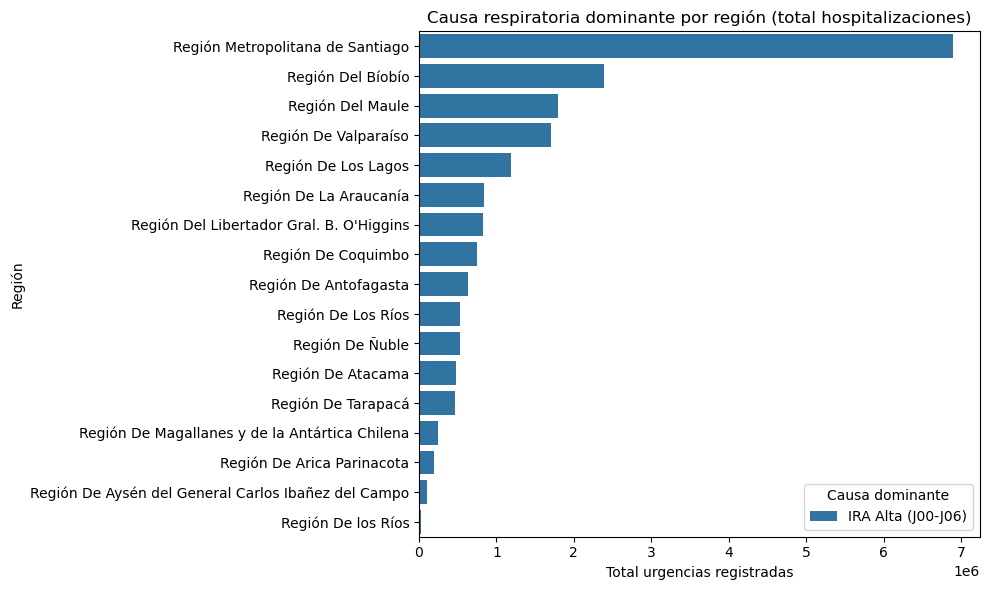

In [83]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=dominantes,
    y="RegionGlosa",
    x="TotalPorCausaEnRegion",
    hue="CausaDominante",
    dodge=False
)

plt.title("Causa respiratoria dominante por región (total hospitalizaciones)")
plt.xlabel("Total urgencias registradas")
plt.ylabel("Región")
plt.legend(title="Causa dominante")
plt.tight_layout()
plt.show()

Buscamos ahora la segunda causa respiratoria más frecuente.

In [84]:
causa_region_sorted = causa_region.sort_values(["RegionGlosa", "NumTotal"], ascending=[True, False])

top2_por_region = causa_region_sorted.groupby("RegionGlosa").head(2).reset_index(drop=True)
top2_por_region

,RegionGlosa,Causa,NumTotal
0,Región De Antofagasta,IRA Alta (J00-J06),635329
1,Región De Antofagasta,Bronquitis/bronquiolitis aguda (J20-J21),103253
2,Región De Arica Parinacota,IRA Alta (J00-J06),198310
3,Región De Arica Parinacota,Bronquitis/bronquiolitis aguda (J20-J21),59002
4,Región De Atacama,IRA Alta (J00-J06),478632
5,Región De Atacama,Bronquitis/bronquiolitis aguda (J20-J21),97584
6,Región De Aysén del General Carlos Ibañez del ...,IRA Alta (J00-J06),108824
7,Región De Aysén del General Carlos Ibañez del ...,Bronquitis/bronquiolitis aguda (J20-J21),32197
8,Región De Coquimbo,IRA Alta (J00-J06),742524
9,Región De Coquimbo,Bronquitis/bronquiolitis aguda (J20-J21),148951


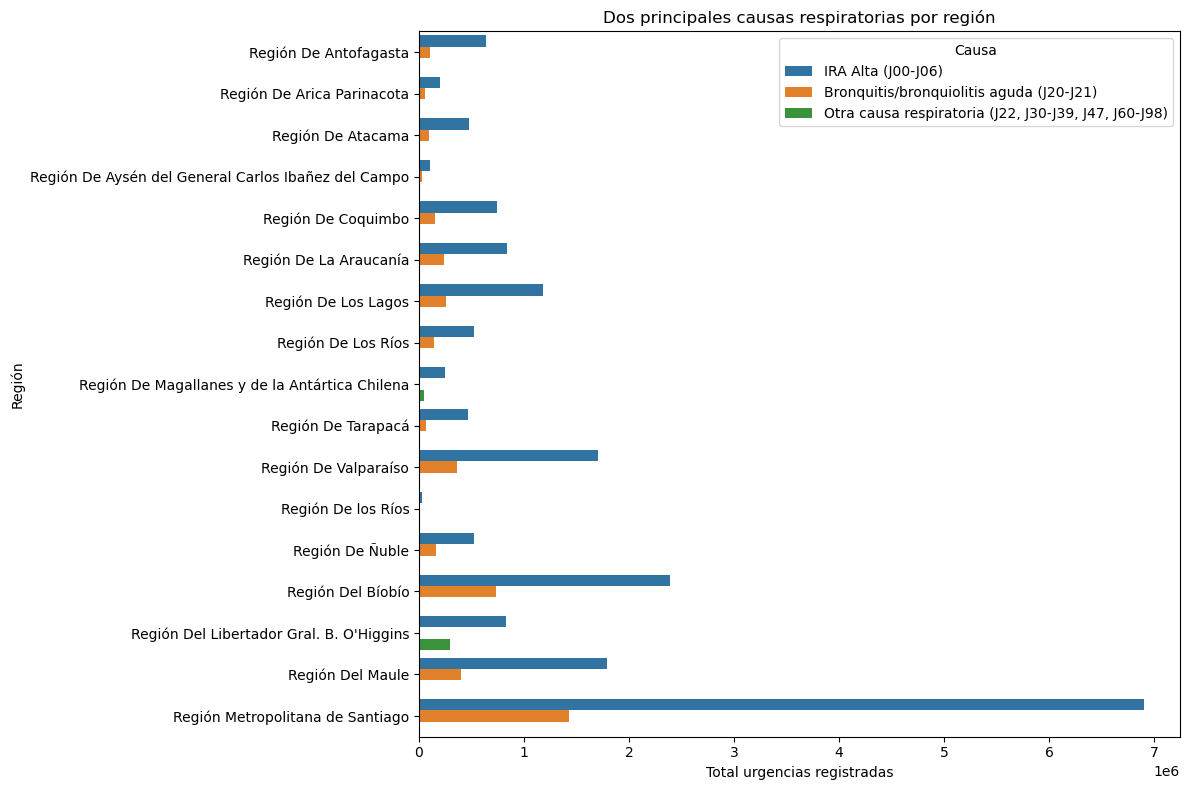

In [86]:
# graficamos 
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top2_por_region,
    y="RegionGlosa",
    x="NumTotal",
    hue="Causa"
)

plt.title("Dos principales causas respiratorias por región")
plt.xlabel("Total urgencias registradas")
plt.ylabel("Región")
plt.legend(title="Causa")
plt.tight_layout()
plt.show()

Si bien, hasta ahora, pareciera ser que la región metropolitana contiene la mayor cantidad de contagios por enfermedades respiratorias registrados en urgencia, esto no está considerando el hecho de que hay regiones con más habitantes que otras, ya que comparar el número total de hospitalizaciones entre regiones no es equitativo, porque la Región Metropolitana, por ejemplo, tiene mucha más población que Aysén.

Para saber cuál región tiene proporcionalmente más contagios, tenemos que calcular la tasa por habitante, es decir:

##### Tasa por 100.000 habitantes = (Hospitalizaciones Totales/población) x 100000

Sacamos los datos de la cantidad de habitantes por región de acuerdo a los datos del censo 2024 **https://censo2024.ine.gob.cl/resultados-dashboard/**
Se crea una tabla manual con la población por cada región.

In [117]:
# población aproximada del censo 2024
poblacion_region = {
    "Región Metropolitana de Santiago": 7400741,
    "Región De Valparaíso": 1896053,
    "Región Del Bíobío": 1613059,
    "Región De La Araucanía": 1010423,
    "Región Del Maule": 1123008,
    "Región De Coquimbo": 832864,
    "Región De Los Lagos": 890284,
    "Región Del Libertador Gral. B. O'Higgins": 987228,
    "Región De Antofagasta": 635416,
    "Región De los Ríos": 398230,
    "Región De Ñuble": 512289,
    "Región De Atacama": 299180,
    "Región De Tarapacá": 369806,
    "Región De Magallanes y de la Antártica Chilena": 166537,
    "Región De Arica Parinacota": 244569,
    "Región De Aysén del General Carlos Ibañez del Campo": 100745
}


In [118]:
dominantes["Poblacion"] = dominantes["RegionGlosa"].map(poblacion_region)
dominantes["Tasa_por_100mil"] = (dominantes["TotalPorCausaEnRegion"] / dominantes["Poblacion"]) * 100000

In [119]:
dominantes.head()

,RegionGlosa,CausaDominante,TotalPorCausaEnRegion,Poblacion,Tasa_por_100mil
0,Región Metropolitana de Santiago,IRA Alta (J00-J06),6899813,7400741.0,93231.380479
1,Región Del Bíobío,IRA Alta (J00-J06),2385223,1613059.0,147869.544759
2,Región Del Maule,IRA Alta (J00-J06),1791817,1123008.0,159555.141192
3,Región De Valparaíso,IRA Alta (J00-J06),1702264,1896053.0,89779.346885
4,Región De Los Lagos,IRA Alta (J00-J06),1184689,890284.0,133068.661236


In [120]:
dominantes.isnull()

,RegionGlosa,CausaDominante,TotalPorCausaEnRegion,Poblacion,Tasa_por_100mil
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,True,True


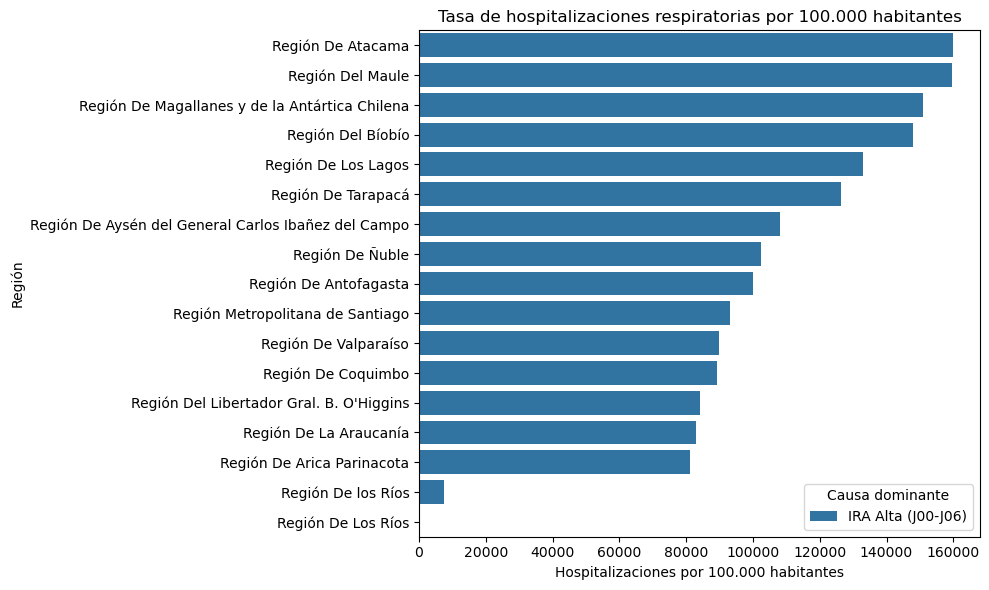

In [121]:
# graficamos los resultados 
plt.figure(figsize=(10, 6))
sns.barplot(
    data=dominantes.sort_values("Tasa_por_100mil", ascending=False),
    y="RegionGlosa",
    x="Tasa_por_100mil",
    hue="CausaDominante",
    dodge=False
)

plt.title("Tasa de hospitalizaciones respiratorias por 100.000 habitantes")
plt.xlabel("Hospitalizaciones por 100.000 habitantes")
plt.ylabel("Región")
plt.legend(title="Causa dominante")
plt.tight_layout()
plt.show()


## SI cambia! 
explicar el análisis y conclusion después

In [124]:
causa_region_sorted["Poblacion"] = causa_region_sorted["RegionGlosa"].map(poblacion_region)

# Calcular tasa
causa_region_sorted["Tasa_por_100mil"] = (
    causa_region_sorted["NumTotal"] / causa_region_sorted["Poblacion"] * 100000
)
causa_region_sorted_tasa = causa_region_sorted.sort_values(["RegionGlosa", "Tasa_por_100mil"], ascending=[True, False])

# Tomamos las dos principales causas por región
top2_por_region_tasa = causa_region_sorted_tasa.groupby("RegionGlosa").head(2).reset_index(drop=True)

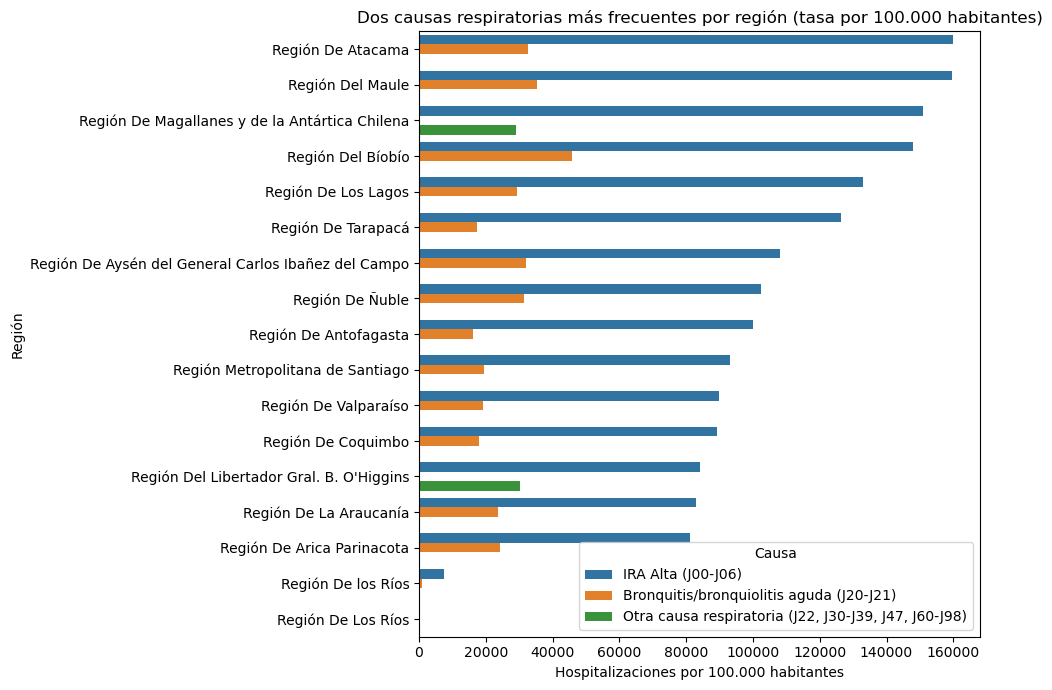

In [127]:
top2_por_region_tasa_sorted = top2_por_region_tasa.sort_values("Tasa_por_100mil", ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(
    data=top2_por_region_tasa_sorted,
    y="RegionGlosa",
    x="Tasa_por_100mil",
    hue="Causa",
    dodge=True
)

plt.title("Dos causas respiratorias más frecuentes por región (tasa por 100.000 habitantes)")
plt.xlabel("Hospitalizaciones por 100.000 habitantes")
plt.ylabel("Región")
plt.legend(title="Causa")
plt.tight_layout()
plt.show()

CONCLUSIONES GENERALES FALTA REDACTAR MÁS Y DEJAR MÁS BONITA LA RESPUESTA TOTAL y dejar un gráfico final con geopandas para entender todo eso (solo 1) !!
A nivel nacional, la causa respiratoria más frecuente es la IRA Alta (J00-J06) en todas las regiones.
Sin embargo, al ajustar por población, regiones más pequeñas como Maule, Biobío o Aysén muestran tasas proporcionalmente más altas que la Región Metropolitana, lo que sugiere que la incidencia real de enfermedades respiratorias no se concentra únicamente en las zonas más pobladas

###  **3. Evolución temporal de las patologías respiratorias**

**Objetivo:** Analizar cómo han cambiado las patologías respiratorias a lo largo del tiempo, especialmente antes y después del COVID-19.

In [48]:
# cosas que debemos hacer para poder resolver esta pregunta
# Seleccionar las columnas `Anio`, `SemanaEstadistica`, `Causa`, `NumTotal`.  
# Calculamos el número total de consultas por año y por tipo de patología.  
# Generar una nueva columna “Periodo” (Pre-COVID / Post-COVID).  
# Graficamos las tendencias temporales antes y después del 2020 
#  Comparamos los valores entre ambos periodos, aqui podemos usar cosas de estadisticas, media, moda mediana, desviacion estandar, etc para comparar 
# con esto interpretamos los datos y respondemos la tercera pregunta secundaria  

### **4. Relación entre grupos etarios y prevalencia**

**Objetivo:** Explorar qué patologías afectan con mayor frecuencia a cada grupo etario.


In [49]:
# cosas que debemos hacer para poder resolver esta pregunta
# Seleccionar las columnas con distribución por edad:  `NumMenor1Anio`, `Num1a4Anios`, `Num5a14Anios`, `Num15a64Anios`, `Num65Mas`.  
# Sumar los valores por año o por tipo de patología (es una idea ahi el q haga esta pregunta decide bien) 
# Visualizar la distribución por grupo etario y tipo de causa (gráfico de barras o apilado el profe es más fan del apilado).  
# con esto interpretamos los datos y respondemos la cuarta pregunta secundaria  

## **5. Integración de resultados y pregunta principal**

**Objetivo:** Responder a la pregunta central del proyecto:  
> **¿Se ha observado un aumento de las enfermedades respiratorias que motivan consultas en urgencias tras la pandemia, en comparación con el periodo previo al COVID-19?**

In [50]:
# aquí me cuesta pensar como podríamos integrar lo que obtengamos de cada pregunta
# asi que ayudenme 